In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [15]:
# Stiff systems
# http://www.scholarpedia.org/article/Stiff_systems
# https://www.mathworks.com/company/newsletters/articles/stiff-differential-equations.html
delta = 0.01 
def f(t, y):
    # dy/dt = y^2(1 - y)
    return [y[0]*y[0]*(1 - y[0])]

t = np.linspace(0, 2./delta, 100).reshape(-1, 1) #training points
y0_list = [delta] 

# Reference solution

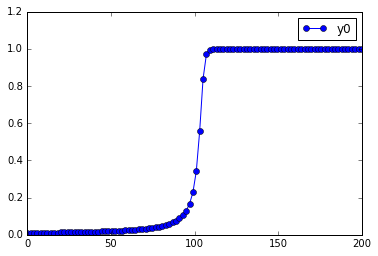

In [16]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='y0')
#plt.plot(sol.t, sol.y[1], marker='o', label='y1')
plt.legend()

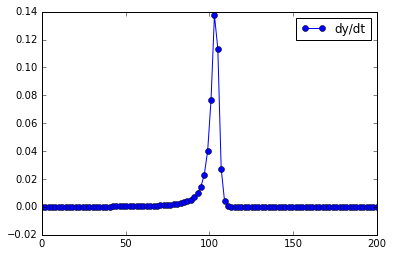

In [17]:
# reference solution using scipy package
plt.plot(sol.t, f(sol.t, sol.y)[0], marker='o', label='dy/dt')
#plt.plot(sol.t, f(sol.t, sol.y)[1], marker='o', label='dy/dt')
plt.legend()

# Neural Net Training

In [18]:
nn = NNSolver(f, t, y0_list, n_hidden=100)
nn

Neural ODE Solver 
Number of equations:       1 
Initial condition y0:      [0.01] 
Numnber of hidden units:   100 
Number of training points: 100 

In [19]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  49522240333.1
         Current function value: 53558.905921
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 8
CPU times: user 106 ms, sys: 5.68 ms, total: 111 ms
Wall time: 98.5 ms


/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:88: RuntimeWarning: overflow encountered in square
  defvjp(anp.tanh,   lambda ans, x : lambda g: g / anp.cosh(x) **2)
/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in cosh
  return f_raw(*args, **kwargs)
/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),
/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd

# Verifying training set

/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:88: RuntimeWarning: overflow encountered in square
  defvjp(anp.tanh,   lambda ans, x : lambda g: g / anp.cosh(x) **2)


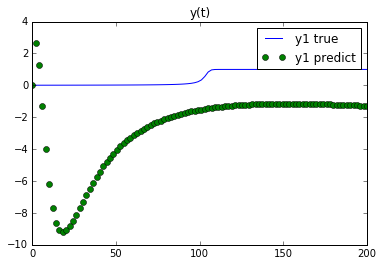

In [20]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

#plt.plot(sol.t, sol.y[1], label='y2 true')
#plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
#plt.xlim((0, 3))
plt.title('y(t)')


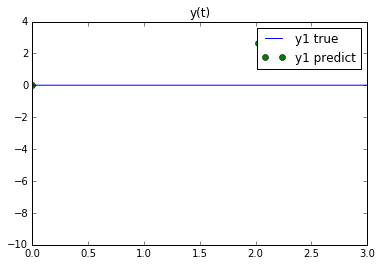

In [21]:
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

#plt.plot(sol.t, sol.y[1], label='y2 true')
#plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.xlim((0, 3))
plt.title('y(t)')

/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:88: RuntimeWarning: overflow encountered in square
  defvjp(anp.tanh,   lambda ans, x : lambda g: g / anp.cosh(x) **2)


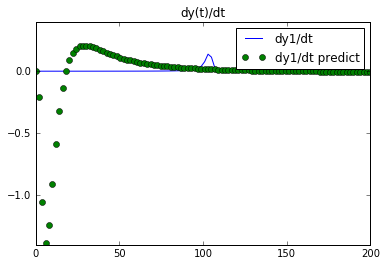

In [22]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

#plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
#plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')